# Comparing classifiers

In this part you will compare the classification algorithms seen in this and the previous labs of MALIS course:

1. K nearest neighbors
2. Logistic regression
3. Neural Networks
4. Support Vector Machine (linear)
5. SVM with RBF kernel
6. Classification Tree

You have only to run the cells and answer the questions you can find after the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore")
from sklearn.exceptions import ConvergenceWarning

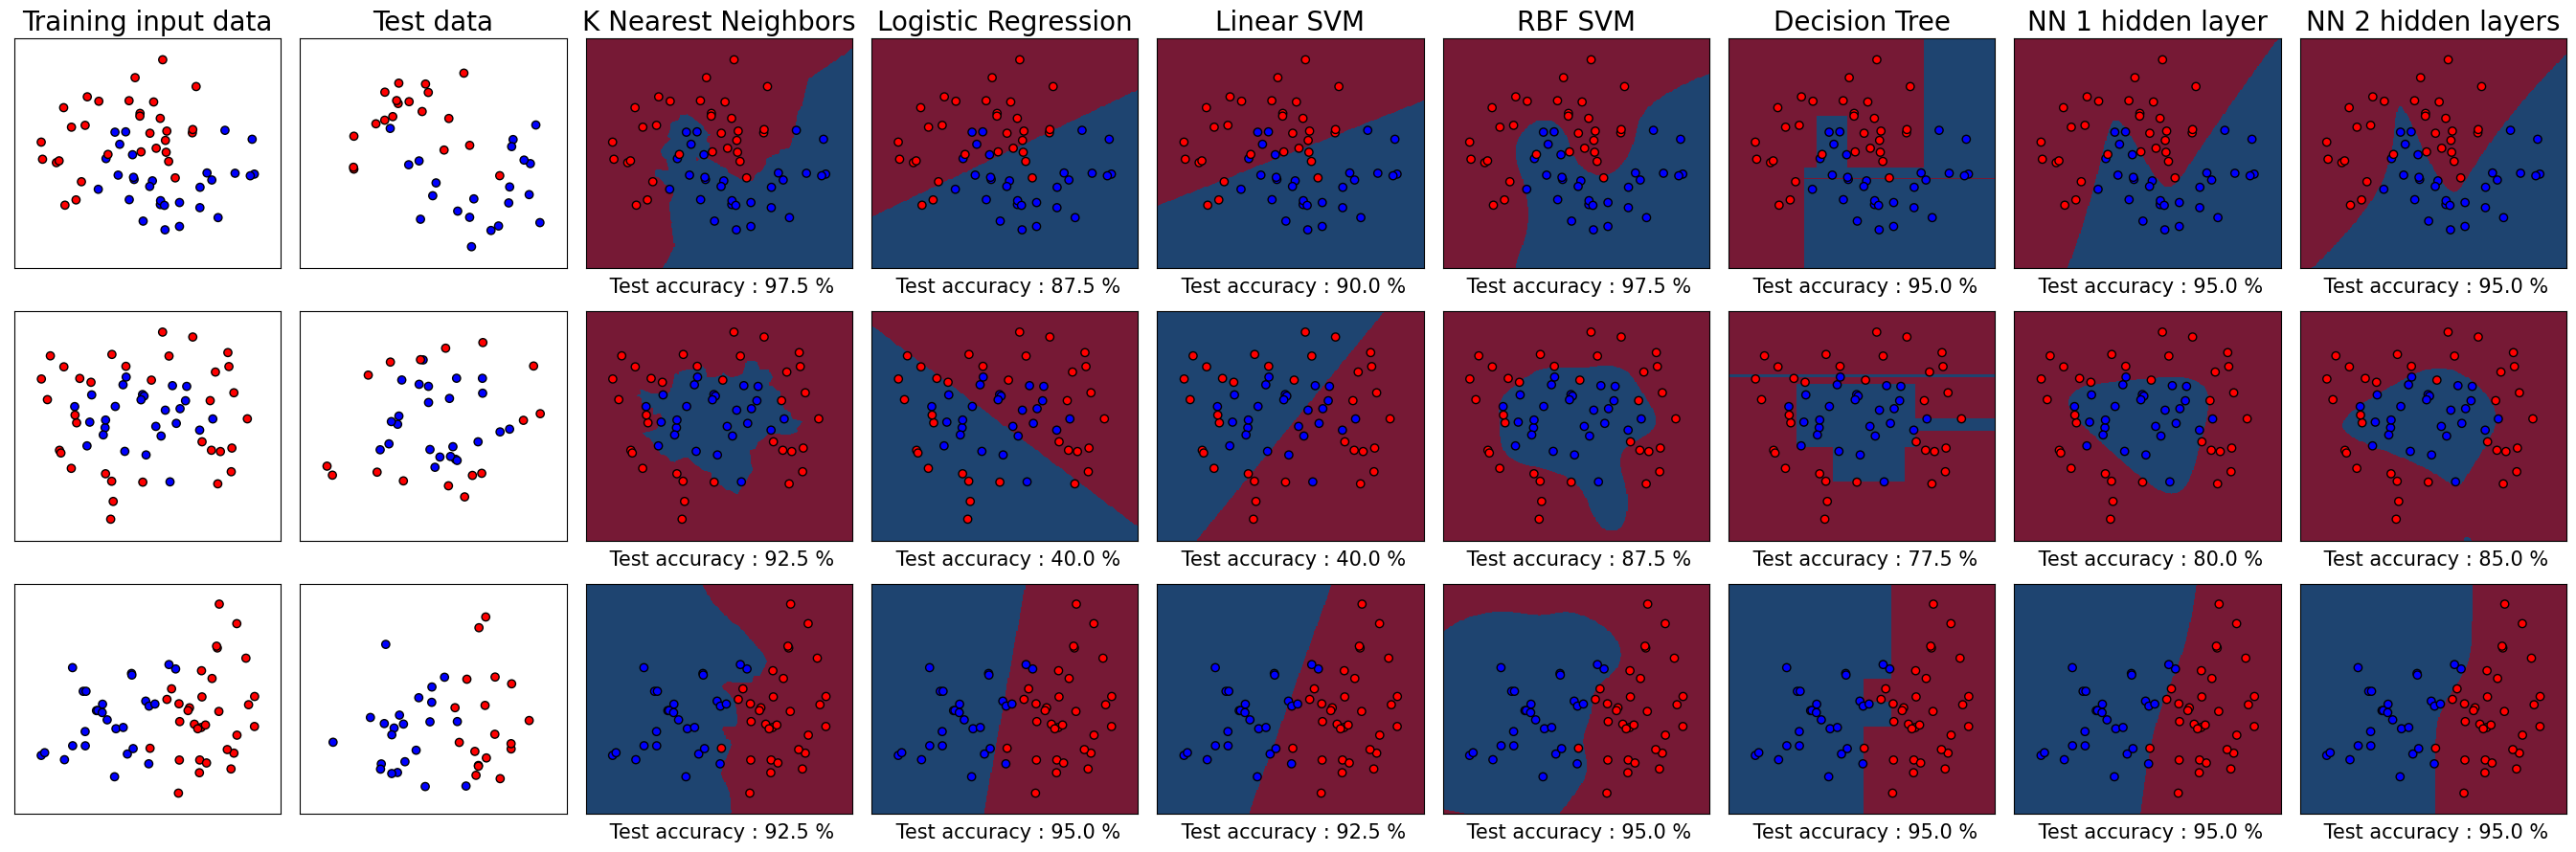

In [3]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(10), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=-10.),
    MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(10, 10), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=-10.)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

## Question 1

Comment the results obtained. Use the following questions to help you.
1. Which classifiers performs poorly? In which datasets? Why?
2. Do you think some classifiers are overfitting?
    1. If yes: which ones? in which datasets? which elements allow you to say that?
    2. If no : what you should see to say that a classifier is overfitting?
3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)

Your answers here: 

1) **Poor classifiers**

    * In the first dataset, it looks like all the classifiers performs good.
    
    * In the second dataset, both the logistic regression and linear SVM perfoms poorly, both with accuracy 40%. This is because the dataset is not linearly separable, while these two classifiers performs best with linearly separated data.
    
    * In the third dataset, it looks like all the classifiers performs good.
    
2) **Overfitting classifiers**

    * **Yes**, I think the Decision Tree is a overfitted classifyer. You can see on the decision boundary plot that the boundaries are complex, for example having a very thin line that comtains a very small amount of points. This means that the classifyer is bad at generalizing. 

    
3) **Changing of parameters**

    * By changing the K in nearest neighbors, we can either get a better or a worse result. A small K can lead to overfitting, and give a bad accuracy for the test set. A big K can lead to underfitting, and decision boundary will be smoother, and not be suitable for non-linear data.
    
    * Changing the hardness of SVM will change the sensitivity and misclassifications. A harder margin will be more sensitive to outliers and noise, but it will also minimize the chance of misclassification. A softer margin will allow more misclassifications to let the boundaries to be less sensitive, so the chance of misclassification will be bigger.
    
    * A large gamma in the RBF kernel will lead to a more narrow and complex decision boundary, which can lead to overfitting. A large gamma will lead to a more wide and more simple dacision boundary, which means it can perform better on unseen data (but can also underfit).
    
    * A shallow tree (small depth) will lead to simpler decision boundaries, and we can experience underfitting where the model performs poorly on unseen data. For a deep tree (large depth) we have a complex decision boundaries, and we can experience overfitting where the model also performs poorly on unseen data.

    
    * Number of neurons in Neural Networks will, like the previous parameters and classifiers, can lead to underfitting and overfitting: A large number can lead to overfitting, and a small number can lead to underfitting.